# 모델 평가의 개념
- 우리가 만든 모델은 얼마나 좋은 것일까?
- 모델을 좋다, 나쁘다 등으로 평가할 방법은 없다.
- 대부분 다양한 모델, 다양한 파라미터를 두고, 상대적으로 비교한다

- 회귀모델들은 실제값과의 에러치를 가지고 계산(평가가 간단한 편)
- 분류모델은 평가항목이 조금 많음
    - Acurracy, Confusion matrix, Precision, Recall, F1 score, ROC AUC

#### 이진 분류모델의 평가
- TP : 실제 p인데 p로 맞춘경우
- FN : 실제 p인데 n으로 틀린경우
- TN : 실제 n인데 n으로 맞춘경우
- FP : 실제 n인데 p로 틀린경우(1종오류)

1. Acurracy : 전체데이터에서 맞춘 비율
2. Precision(정밀도) : p라고 예측한 것 중에서 실제로 p였던 비율
3. Recall(재현률) : 실제 p인 데이터 중에서 p라고 예측한 것
4. Fall_out : 실제 n중에서 p라고 잘못 예측한 것

**재현률는 예를들어서 놓쳐서는 안되는 p의 데이터를 반드시 예측해야 할 때(암환자 예측) 사용한다. (그래서 N을 몇개예측해서 맞췄는지는 관심없음)**

**정밀도는 예측한 것 중에서 정말로 p인것이 많은지 적은지 확인할 떄 사용한다. (스팸메일)**

---

#### - 분류모델은 그 결과를 속할 비율을 반환한다.
0.5(threshold)보다 크면 1이고 작으면 0으로 판단

그 threshold를 변경해 가면서 모델 평가 지표들을 관찰해 보자!

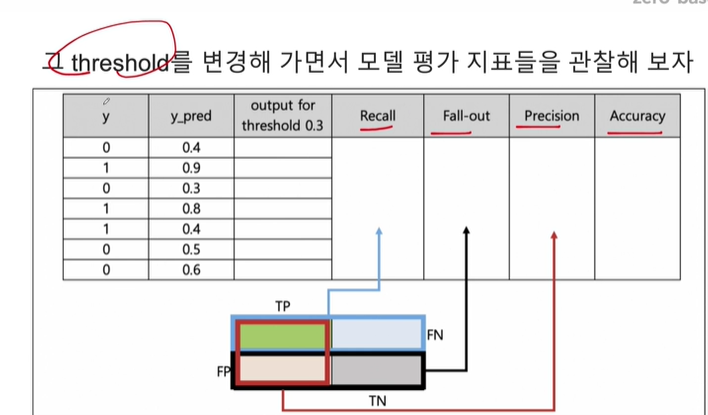 

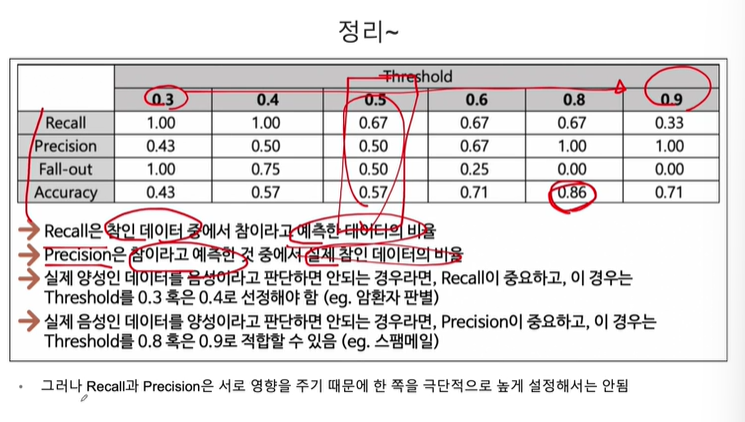

내가 임의로 threshold를 강제로 옮기는 것은 의미가 없다. 그냥 올리거나 내리면 어떻게 되는지 보는 것임

#### F1 score

$$F{1} = \frac {2*{precision* recall}}{precision + recall}$$

- recall, precision이 어느 한쪽으로 치우치지 않고 둘 다 높은 값을 가질수록 높은 값을 가짐

---

# Roc와 AUC

- FPR(Fallout)이 변할 때, TPR(recall)의 변화를 그린 그림
- AUC는 곡선과 대각선 사이의 면적, 0.5보다 커야한다.1에 가까울수록 좋은 수치

#### ROC 커브 그리기

In [3]:
import pandas as pd
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url,sep=';')
white_wine = pd.read_csv(white_url,sep=';')

red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine,white_wine])

wine['taste'] = [1 if grade > 5 else 0 for grade in wine['quality']]

X = wine.drop(['taste','quality'], axis=1)
Y = wine['taste']

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#quality 컬럼도 빼고 다시
X = wine.drop(columns=['taste','quality'],axis=1)
Y = wine['taste']

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=13)


wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train,y_train)


y_pred_tr = wine_tree.predict(X_train) #훈련데이터에 대한 정확도검증
y_pred_test = wine_tree.predict(X_test)

print('Train Acc:',accuracy_score(y_train,y_pred_tr))
print('Test Acc:',accuracy_score(y_test,y_pred_test))

Train Acc: 0.7294593034442948
Test Acc: 0.7161538461538461


각 수치 구하기

In [5]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print('Accuracy :',accuracy_score(y_test,y_pred_test))
print('Recall :',recall_score(y_test,y_pred_test))
print('Precision :',precision_score(y_test,y_pred_test))
print('AUC score :',roc_auc_score(y_test,y_pred_test))
print('F1 score :',f1_score(y_test,y_pred_test))

Accuracy : 0.7161538461538461
Recall : 0.7314702308626975
Precision : 0.8026666666666666
AUC score : 0.7105988470875331
F1 score : 0.7654164017800381


커브 그리기

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

pred_proba = wine_tree.predict_proba(X_test)[:,1] #1일 확률만 가져오기
fpr, tpr, thershold = roc_curve(y_test,pred_proba)

In [11]:
fpr

array([0.        , 0.14884696, 0.25366876, 0.31027254, 1.        ])

In [12]:
tpr

array([0.        , 0.45078979, 0.65492102, 0.73147023, 1.        ])

In [13]:
thershold

array([       inf, 0.87802198, 0.72692794, 0.67447307, 0.38397406])

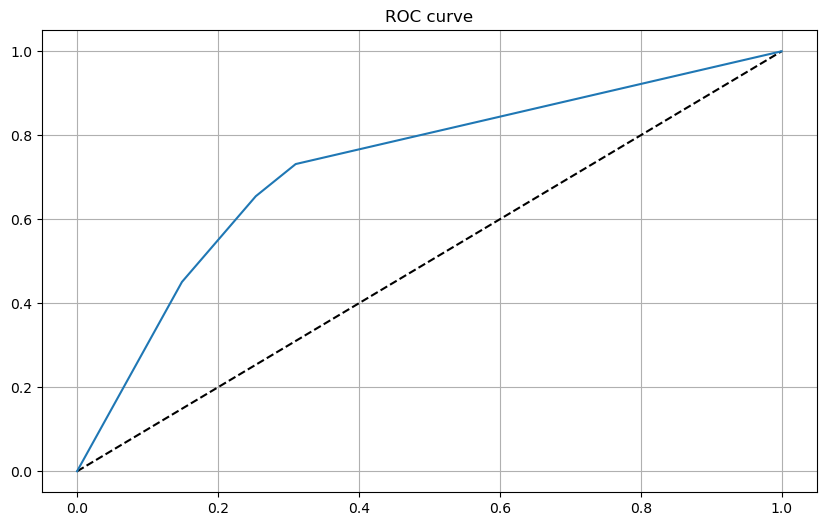

In [17]:
plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1],'black',ls = 'dashed')
plt.plot(fpr,tpr)
plt.grid()
plt.title('ROC curve')
plt.show()